In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def lineal(x, a, b):
    return a*x + b
def coef_determinacion(observaciones, predicciones):
    residuo = observaciones - predicciones
    ss_res = np.sum(residuo**2)
    ss_tot = np.sum((observaciones - np.mean(observaciones))**2)
    r_cuadrado = 1 - (ss_res/ss_tot)
    return r_cuadrado
def regresion(modelo, x, y):
    # No puede haber nungún NaN
    ajuste, covarianzas = curve_fit(modelo, x, y)
    predicciones = modelo(x, *ajuste)
    errores = np.sqrt(np.diag(covarianzas))
    r_cuadrado = coef_determinacion(y, predicciones)
    return predicciones, ajuste, errores, r_cuadrado

def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 40, fontweight='bold')
    plt.xlabel(ejex, fontsize = 20)
    plt.ylabel(ejey, fontsize = 20)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
def grafico_modelo(x, y, predicciones, ajuste, errores, r_cuad):
    plt.plot(x, y, 'bo')
    plt.plot(x, predicciones, 'r-',
             label = (' a = ' + cifras_signif(ajuste[0], 2)
                      + 'std_a = ' + cifras_signif(errores[0], 2) + '\n'
                      + ' b = ' + cifras_signif(ajuste[1], 2)
                      + ' std_b = ' + cifras_signif(errores[1], 2) + '\n'
                      + ' R^2 = ' + cifras_signif(r_cuad, 2)
                     )
             )
    plt.legend()
    return

def regresion_y_grafico(modelo, x, y, titulo, xlabel, ylabel):
    predicciones, ajuste, errores, r_cuadrado = regresion(modelo, x, y)
    scatter = plt.figure(figsize = (18, 9))
    metadata(titulo, xlabel, ylabel)
    grafico_modelo(x, y, predicciones, ajuste, errores, r_cuadrado)
    return

In [52]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_1.txt',
    delimiter = ' ',
    decimal = ','
    )

In [53]:
datos.head()

,Anio,Area_cosechada(ha),Produccion(QQ),Precipitacion(mm)
0,1960/61,253690,3870200,1415
1,1961/62,221795,3144665,1136
2,1962/63,282594,4629181,1366
3,1963/64,246686,4501665,1046
4,1964/65,236792,4165451,1100


In [54]:
datos['Rendimiento'] = datos['Produccion(QQ)'] / datos['Area_cosechada(ha)']

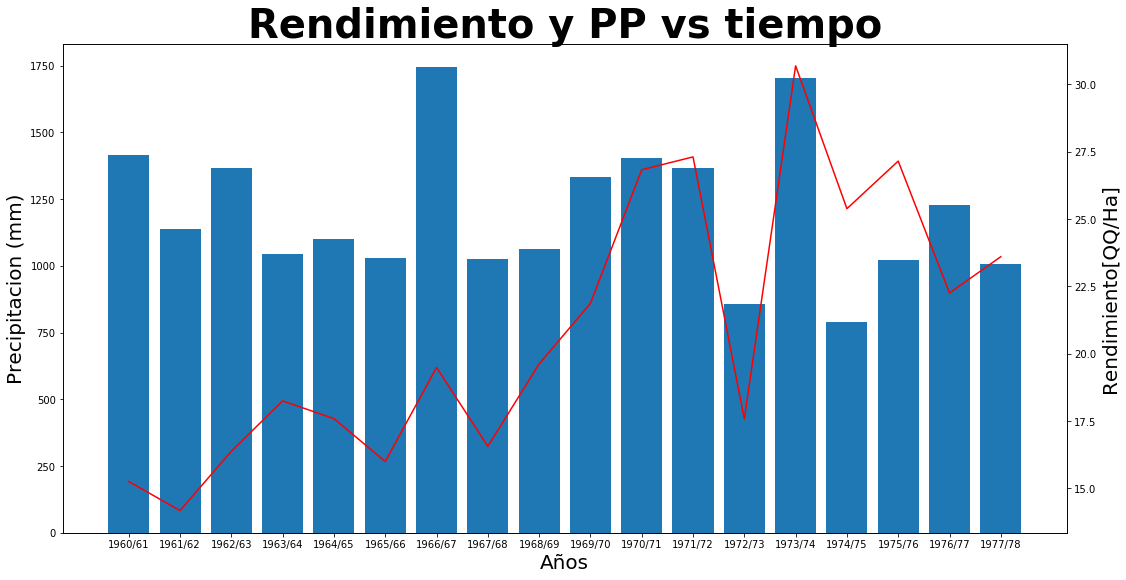

In [55]:
rendimiento, ax1 = plt.subplots(figsize = (18, 9))
metadata('Rendimiento y PP vs tiempo', 'Años', 'Precipitacion (mm)')
plt.bar(
    datos['Anio'],
    datos['Precipitacion(mm)'],
    )
ax2 = ax1.twinx()
ax2.set_ylabel('Rendimiento[QQ/Ha]',
               fontsize = 20
              )
plt.plot(
    datos['Anio'],
    datos['Rendimiento'],
    'r-'
    )

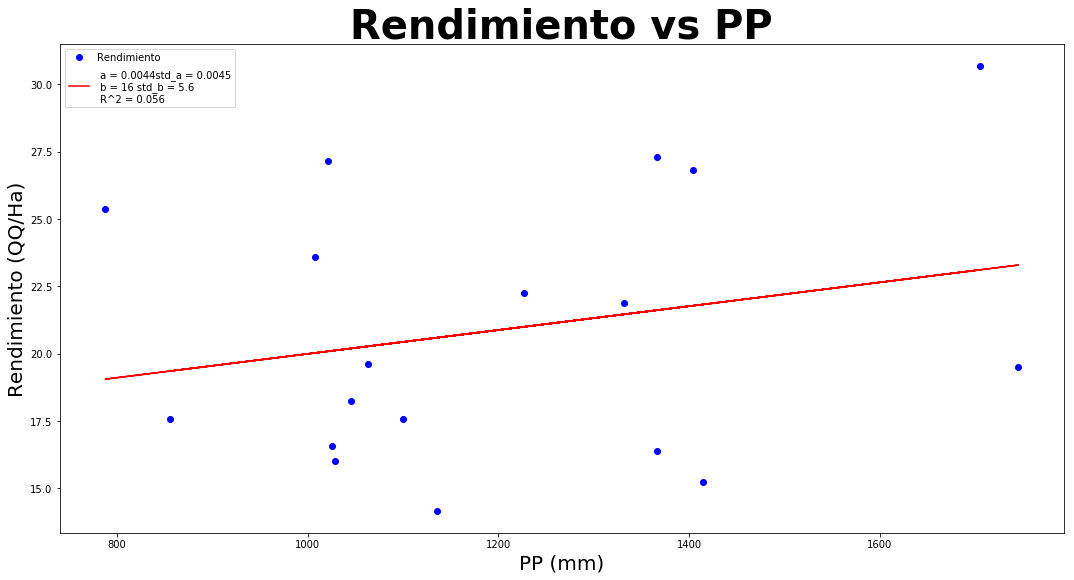

In [87]:
regresion_y_grafico(lineal, datos['Precipitacion(mm)'], datos['Rendimiento'],
                    'Rendimiento vs PP', 'PP (mm)', 'Rendimiento (QQ/Ha)'
                   )

In [78]:
datos['Rendimiento'].describe()

count    18.000000
mean     20.888426
std       4.935613
min      14.178250
25%      16.817714
50%      19.555577
75%      24.938243
max      30.687646
Name: Rendimiento, dtype: float64

In [79]:
datos['Precipitacion(mm)'].describe()

count      18.000000
mean     1201.888889
std       264.109801
min       788.000000
25%      1026.750000
50%      1118.000000
75%      1366.000000
max      1745.000000
Name: Precipitacion(mm), dtype: float64

In [81]:
np.corrcoef(datos['Precipitacion(mm)'], datos['Rendimiento'])

array([[1.        , 0.23686246],
       [0.23686246, 1.        ]])

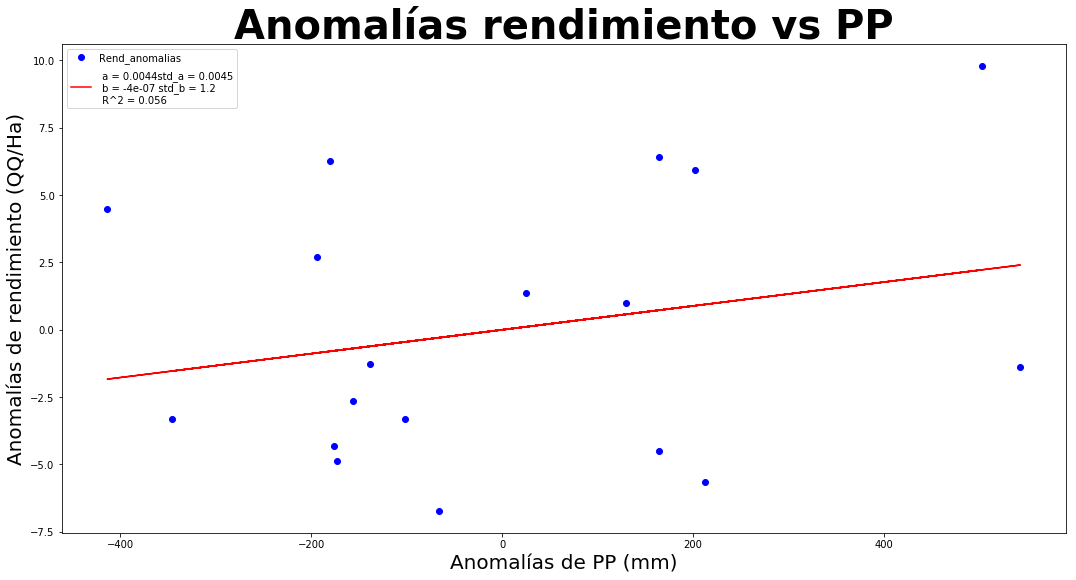

In [88]:
datos['PP_anomalias'] = datos['Precipitacion(mm)'] - datos['Precipitacion(mm)'].mean()
datos['Rend_anomalias'] = datos['Rendimiento'] - datos['Rendimiento'].mean()
regresion_y_grafico(lineal, datos['PP_anomalias'],
                    datos['Rend_anomalias'], 'Anomalías rendimiento vs PP',
                    'Anomalías de PP (mm)', 'Anomalías de rendimiento (QQ/Ha)'
                   )